In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly 

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


TO FINDOUT MISSING DATA WE'LL USE HEATMAPS (THIS WILL BE ANALOGUS TO THE WAY WE USED AMELIA'S MISSING MAP IN R)

<AxesSubplot:>

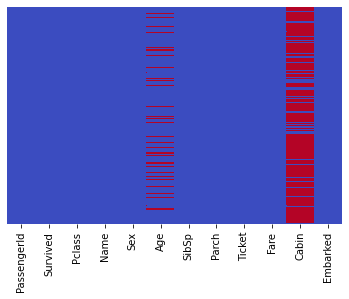

In [4]:
sns.heatmap(train.isnull() , yticklabels=False,cbar=False, cmap = 'coolwarm') 
# red bars indiacates data is missing

<AxesSubplot:xlabel='Survived', ylabel='count'>

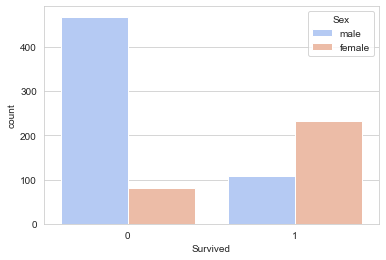

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Sex',data=train , palette='coolwarm')
#train.iplot(kind='bar', x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

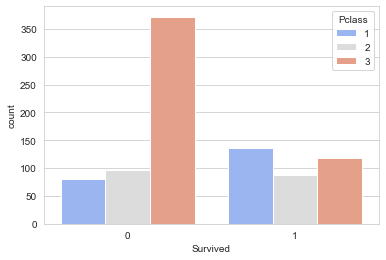

In [6]:
sns.countplot(x='Survived', hue = 'Pclass',data=train , palette='coolwarm')

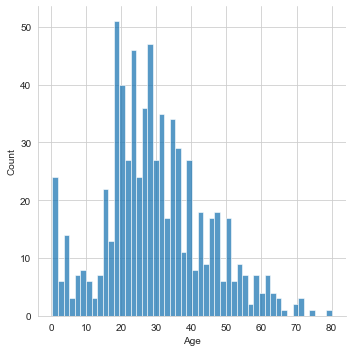

In [7]:
sns.displot(train['Age'].dropna(),kde=False,bins=50)

In [8]:
train['Age'].dropna().iplot(kind='hist', bins=50)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

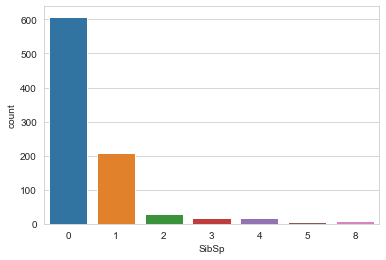

In [10]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

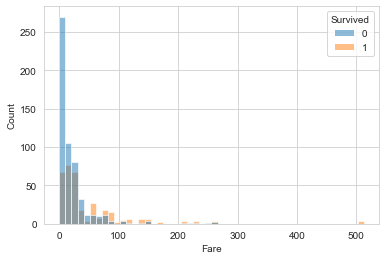

In [11]:
sns.histplot(x='Fare',data=train,hue='Survived', bins=50)

In [12]:
train['Fare'].iplot(kind='hist')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

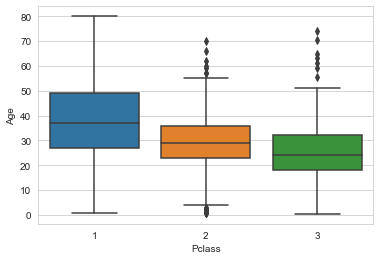

In [13]:
sns.boxplot(data=train,x='Pclass',y='Age')

In [14]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [15]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [16]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [17]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass==3:
            return 25
    else:
        return age
        
    
            

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1) 
# PLEASE USE AXIS=1 VERY VERY IMPORTANT!!!!!!!!!!!!!

<AxesSubplot:>

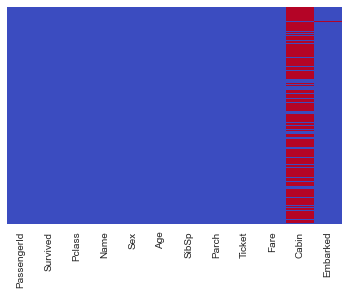

In [19]:
sns.heatmap(train.isnull(), cmap='coolwarm', cbar=False,yticklabels=False)

In [20]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

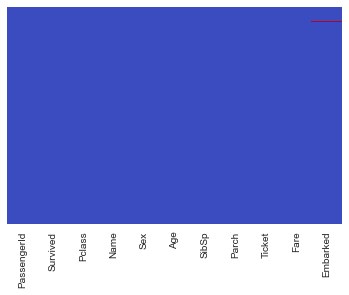

In [21]:
sns.heatmap(train.isnull(), cmap='coolwarm', cbar=False,yticklabels=False)
# only two values from Embarked column are missing

In [22]:
train.dropna(inplace=True)

<AxesSubplot:>

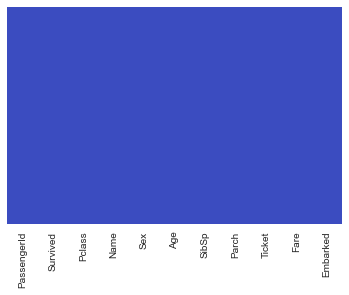

In [23]:
sns.heatmap(train.isnull(), cmap='coolwarm', cbar=False,yticklabels=False)
# no value is missing now

CONVERTING CATEGORICAL FEATURES INTO DUMMY VALUES 
    SUPER IMPORTANT!!!!!!!!!!!

In [24]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [25]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [26]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
train = pd.concat([train,sex,embark], axis = 1)

In [28]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [29]:
train.drop(['Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [30]:
train.drop('PassengerId',axis=1,inplace=True)
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


In [31]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression(max_iter=100000)

In [36]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       216
           1       0.77      0.68      0.72       140

    accuracy                           0.79       356
   macro avg       0.79      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356



In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test,predictions)

array([[188,  28],
       [ 45,  95]], dtype=int64)

NOW LET'S DO THE SAME THING ON TEST DATASET AS WELL!!!!!!!!

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.25,1,0,1


In [44]:
test.drop('PassengerId',axis=1,inplace=True)

In [45]:
test.drop('Name',axis=1,inplace=True)

In [46]:
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q


In [47]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [48]:
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [49]:
test = pd.concat([test,sex,embark], axis=1)

In [50]:
test.drop('Cabin',axis=1,inplace=True)
test.drop('Embarked',axis=1,inplace=True)

In [51]:
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,3,male,34.5,0,0,330911,7.8292,1,1,0


<AxesSubplot:>

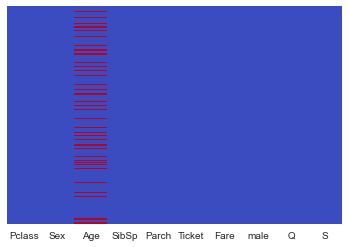

In [52]:
sns.heatmap(data=test.isnull() , cmap='coolwarm', yticklabels=False, cbar=False)

In [53]:
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis=1)

In [54]:
test.drop('Sex',axis=1, inplace=True)

<AxesSubplot:>

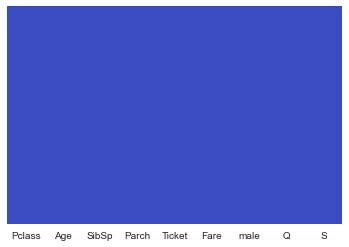

In [55]:
sns.heatmap(data=test.isnull() , cmap='coolwarm', yticklabels=False, cbar=False)

In [56]:
test['Fare'].isnull().values.any() # to check if there is any null value in the dataset

True

In [57]:
test['Fare'].isnull().sum() #only value is null

1

In [58]:
test.dropna(inplace=True)  # dropping any remaining NA values

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
test.drop('Ticket',inplace=True, axis=1)

In [61]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


NOW LET'S FIT OUR LOGISTIC REGRESSION MODEL

In [62]:
Survived = logmodel.predict(test)

In [63]:
Survived = pd.Series(Survived)

In [64]:
test_df = pd.concat([Survived,test],axis=1)

In [65]:
test_df.columns

Index([0, 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [66]:
test_df.columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [67]:
test_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0
1,0.0,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0
2,0.0,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0
3,0.0,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0
4,1.0,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0


In [68]:
test_df.to_csv('TitanicTestUsingPandas.csv')

In [69]:
PassengerId = pd.Series(range(892,1310))

In [70]:
titanic_wala = pd.concat([PassengerId,test_df], axis=1)

In [71]:
titanic_wala.columns = ['PassengerId','Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [72]:
titanic_wala.drop(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], axis=1,inplace=True)

In [73]:
titanic_wala.to_csv('TitanicWalaUsingPython.csv', index=False)

# FURTHER IMPLEMENTATION

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc = StandardScaler()

In [76]:
X_new_train = sc.fit_transform(X_train)

In [77]:
X_new_test = sc.transform(X_test)

In [78]:
from catboost import CatBoostClassifier

In [79]:
cb = CatBoostClassifier()

In [80]:
cb.fit(X_new_train , y_train)

Learning rate set to 0.007875
0:	learn: 0.6880954	total: 150ms	remaining: 2m 29s
1:	learn: 0.6826802	total: 152ms	remaining: 1m 16s
2:	learn: 0.6778575	total: 155ms	remaining: 51.4s
3:	learn: 0.6731657	total: 157ms	remaining: 39s
4:	learn: 0.6682362	total: 158ms	remaining: 31.5s
5:	learn: 0.6652847	total: 159ms	remaining: 26.4s
6:	learn: 0.6608211	total: 161ms	remaining: 22.9s
7:	learn: 0.6561040	total: 163ms	remaining: 20.3s
8:	learn: 0.6518909	total: 165ms	remaining: 18.2s
9:	learn: 0.6475920	total: 167ms	remaining: 16.6s
10:	learn: 0.6426902	total: 169ms	remaining: 15.2s
11:	learn: 0.6382311	total: 171ms	remaining: 14.1s
12:	learn: 0.6343396	total: 172ms	remaining: 13.1s
13:	learn: 0.6298177	total: 174ms	remaining: 12.3s
14:	learn: 0.6258117	total: 176ms	remaining: 11.6s
15:	learn: 0.6218983	total: 178ms	remaining: 11s
16:	learn: 0.6180063	total: 180ms	remaining: 10.4s
17:	learn: 0.6141586	total: 182ms	remaining: 9.93s
18:	learn: 0.6107148	total: 184ms	remaining: 9.48s
19:	learn: 0.

226:	learn: 0.3732075	total: 506ms	remaining: 1.72s
227:	learn: 0.3729613	total: 507ms	remaining: 1.72s
228:	learn: 0.3727529	total: 509ms	remaining: 1.71s
229:	learn: 0.3723662	total: 510ms	remaining: 1.71s
230:	learn: 0.3721490	total: 512ms	remaining: 1.7s
231:	learn: 0.3719563	total: 513ms	remaining: 1.7s
232:	learn: 0.3717493	total: 515ms	remaining: 1.69s
233:	learn: 0.3716017	total: 516ms	remaining: 1.69s
234:	learn: 0.3712546	total: 518ms	remaining: 1.69s
235:	learn: 0.3708657	total: 519ms	remaining: 1.68s
236:	learn: 0.3704580	total: 521ms	remaining: 1.68s
237:	learn: 0.3702866	total: 522ms	remaining: 1.67s
238:	learn: 0.3699761	total: 524ms	remaining: 1.67s
239:	learn: 0.3696911	total: 526ms	remaining: 1.66s
240:	learn: 0.3695024	total: 527ms	remaining: 1.66s
241:	learn: 0.3694783	total: 528ms	remaining: 1.65s
242:	learn: 0.3690255	total: 529ms	remaining: 1.65s
243:	learn: 0.3685997	total: 531ms	remaining: 1.65s
244:	learn: 0.3683589	total: 533ms	remaining: 1.64s
245:	learn: 0.

449:	learn: 0.3260330	total: 833ms	remaining: 1.02s
450:	learn: 0.3259702	total: 834ms	remaining: 1.01s
451:	learn: 0.3258225	total: 836ms	remaining: 1.01s
452:	learn: 0.3254562	total: 837ms	remaining: 1.01s
453:	learn: 0.3253146	total: 839ms	remaining: 1.01s
454:	learn: 0.3251868	total: 840ms	remaining: 1.01s
455:	learn: 0.3249127	total: 842ms	remaining: 1s
456:	learn: 0.3248247	total: 843ms	remaining: 1s
457:	learn: 0.3244909	total: 845ms	remaining: 1s
458:	learn: 0.3243228	total: 847ms	remaining: 998ms
459:	learn: 0.3240253	total: 848ms	remaining: 996ms
460:	learn: 0.3238756	total: 850ms	remaining: 993ms
461:	learn: 0.3237834	total: 851ms	remaining: 991ms
462:	learn: 0.3235187	total: 853ms	remaining: 989ms
463:	learn: 0.3233510	total: 854ms	remaining: 987ms
464:	learn: 0.3233212	total: 855ms	remaining: 984ms
465:	learn: 0.3231953	total: 857ms	remaining: 982ms
466:	learn: 0.3231142	total: 858ms	remaining: 980ms
467:	learn: 0.3229938	total: 860ms	remaining: 977ms
468:	learn: 0.3229907

671:	learn: 0.2945461	total: 1.16s	remaining: 564ms
672:	learn: 0.2944163	total: 1.16s	remaining: 563ms
673:	learn: 0.2941883	total: 1.16s	remaining: 561ms
674:	learn: 0.2940565	total: 1.16s	remaining: 559ms
675:	learn: 0.2939024	total: 1.16s	remaining: 557ms
676:	learn: 0.2937180	total: 1.16s	remaining: 555ms
677:	learn: 0.2935963	total: 1.17s	remaining: 554ms
678:	learn: 0.2934933	total: 1.17s	remaining: 552ms
679:	learn: 0.2933632	total: 1.17s	remaining: 550ms
680:	learn: 0.2931348	total: 1.17s	remaining: 548ms
681:	learn: 0.2929701	total: 1.17s	remaining: 546ms
682:	learn: 0.2928911	total: 1.17s	remaining: 545ms
683:	learn: 0.2928759	total: 1.17s	remaining: 543ms
684:	learn: 0.2927810	total: 1.18s	remaining: 541ms
685:	learn: 0.2926905	total: 1.18s	remaining: 539ms
686:	learn: 0.2926029	total: 1.18s	remaining: 537ms
687:	learn: 0.2924816	total: 1.18s	remaining: 535ms
688:	learn: 0.2923868	total: 1.18s	remaining: 533ms
689:	learn: 0.2922322	total: 1.18s	remaining: 532ms
690:	learn: 

894:	learn: 0.2682592	total: 1.48s	remaining: 174ms
895:	learn: 0.2680319	total: 1.48s	remaining: 172ms
896:	learn: 0.2679099	total: 1.48s	remaining: 170ms
897:	learn: 0.2677518	total: 1.48s	remaining: 169ms
898:	learn: 0.2676104	total: 1.49s	remaining: 167ms
899:	learn: 0.2675171	total: 1.49s	remaining: 165ms
900:	learn: 0.2673668	total: 1.49s	remaining: 164ms
901:	learn: 0.2671846	total: 1.49s	remaining: 162ms
902:	learn: 0.2671004	total: 1.49s	remaining: 160ms
903:	learn: 0.2670420	total: 1.49s	remaining: 159ms
904:	learn: 0.2670116	total: 1.49s	remaining: 157ms
905:	learn: 0.2668919	total: 1.5s	remaining: 155ms
906:	learn: 0.2667621	total: 1.5s	remaining: 154ms
907:	learn: 0.2665981	total: 1.5s	remaining: 152ms
908:	learn: 0.2665234	total: 1.5s	remaining: 150ms
909:	learn: 0.2664655	total: 1.5s	remaining: 149ms
910:	learn: 0.2663719	total: 1.5s	remaining: 147ms
911:	learn: 0.2661403	total: 1.51s	remaining: 145ms
912:	learn: 0.2659529	total: 1.51s	remaining: 144ms
913:	learn: 0.2657

In [81]:
from sklearn.model_selection import cross_val_score

In [90]:
err = cross_val_score(estimator=cb , X = X_new_train , y = y_train , cv = 10)

Learning rate set to 0.007524
0:	learn: 0.6880706	total: 2.15ms	remaining: 2.14s
1:	learn: 0.6829070	total: 4.14ms	remaining: 2.07s
2:	learn: 0.6778817	total: 6.08ms	remaining: 2.02s
3:	learn: 0.6726216	total: 7.86ms	remaining: 1.96s
4:	learn: 0.6678411	total: 9.45ms	remaining: 1.88s
5:	learn: 0.6627637	total: 11.2ms	remaining: 1.86s
6:	learn: 0.6582235	total: 12.8ms	remaining: 1.81s
7:	learn: 0.6541790	total: 14.7ms	remaining: 1.82s
8:	learn: 0.6499507	total: 16.5ms	remaining: 1.81s
9:	learn: 0.6457483	total: 18.2ms	remaining: 1.8s
10:	learn: 0.6416587	total: 19.7ms	remaining: 1.77s
11:	learn: 0.6375648	total: 22ms	remaining: 1.81s
12:	learn: 0.6336310	total: 24ms	remaining: 1.82s
13:	learn: 0.6295615	total: 25.7ms	remaining: 1.81s
14:	learn: 0.6263551	total: 26.9ms	remaining: 1.76s
15:	learn: 0.6227857	total: 28ms	remaining: 1.72s
16:	learn: 0.6192999	total: 29.7ms	remaining: 1.71s
17:	learn: 0.6154324	total: 31.6ms	remaining: 1.72s
18:	learn: 0.6121208	total: 33.3ms	remaining: 1.72s

214:	learn: 0.3725135	total: 315ms	remaining: 1.15s
215:	learn: 0.3719987	total: 316ms	remaining: 1.15s
216:	learn: 0.3718562	total: 317ms	remaining: 1.15s
217:	learn: 0.3713956	total: 319ms	remaining: 1.14s
218:	learn: 0.3711715	total: 320ms	remaining: 1.14s
219:	learn: 0.3706987	total: 322ms	remaining: 1.14s
220:	learn: 0.3702934	total: 323ms	remaining: 1.14s
221:	learn: 0.3701296	total: 325ms	remaining: 1.14s
222:	learn: 0.3698801	total: 326ms	remaining: 1.14s
223:	learn: 0.3693849	total: 328ms	remaining: 1.14s
224:	learn: 0.3692322	total: 329ms	remaining: 1.13s
225:	learn: 0.3689248	total: 330ms	remaining: 1.13s
226:	learn: 0.3685123	total: 332ms	remaining: 1.13s
227:	learn: 0.3681151	total: 334ms	remaining: 1.13s
228:	learn: 0.3678509	total: 336ms	remaining: 1.13s
229:	learn: 0.3676969	total: 337ms	remaining: 1.13s
230:	learn: 0.3674755	total: 339ms	remaining: 1.13s
231:	learn: 0.3672752	total: 350ms	remaining: 1.16s
232:	learn: 0.3669590	total: 351ms	remaining: 1.16s
233:	learn: 

443:	learn: 0.3223221	total: 637ms	remaining: 798ms
444:	learn: 0.3220990	total: 639ms	remaining: 797ms
445:	learn: 0.3219944	total: 641ms	remaining: 796ms
446:	learn: 0.3218258	total: 642ms	remaining: 794ms
447:	learn: 0.3215298	total: 644ms	remaining: 793ms
448:	learn: 0.3214138	total: 645ms	remaining: 792ms
449:	learn: 0.3212188	total: 647ms	remaining: 790ms
450:	learn: 0.3209107	total: 648ms	remaining: 789ms
451:	learn: 0.3205961	total: 650ms	remaining: 788ms
452:	learn: 0.3205009	total: 651ms	remaining: 786ms
453:	learn: 0.3204072	total: 653ms	remaining: 785ms
454:	learn: 0.3204036	total: 653ms	remaining: 783ms
455:	learn: 0.3203134	total: 655ms	remaining: 781ms
456:	learn: 0.3199875	total: 657ms	remaining: 780ms
457:	learn: 0.3198612	total: 658ms	remaining: 778ms
458:	learn: 0.3197189	total: 659ms	remaining: 777ms
459:	learn: 0.3196719	total: 660ms	remaining: 775ms
460:	learn: 0.3196656	total: 661ms	remaining: 773ms
461:	learn: 0.3194880	total: 663ms	remaining: 772ms
462:	learn: 

683:	learn: 0.2911236	total: 959ms	remaining: 443ms
684:	learn: 0.2910087	total: 960ms	remaining: 442ms
685:	learn: 0.2909578	total: 962ms	remaining: 440ms
686:	learn: 0.2907572	total: 963ms	remaining: 439ms
687:	learn: 0.2905616	total: 965ms	remaining: 437ms
688:	learn: 0.2904739	total: 966ms	remaining: 436ms
689:	learn: 0.2904073	total: 968ms	remaining: 435ms
690:	learn: 0.2902989	total: 969ms	remaining: 433ms
691:	learn: 0.2902063	total: 971ms	remaining: 432ms
692:	learn: 0.2901451	total: 972ms	remaining: 431ms
693:	learn: 0.2900652	total: 974ms	remaining: 429ms
694:	learn: 0.2897517	total: 976ms	remaining: 428ms
695:	learn: 0.2896236	total: 977ms	remaining: 427ms
696:	learn: 0.2894343	total: 979ms	remaining: 425ms
697:	learn: 0.2893178	total: 980ms	remaining: 424ms
698:	learn: 0.2891510	total: 981ms	remaining: 423ms
699:	learn: 0.2891116	total: 983ms	remaining: 421ms
700:	learn: 0.2889092	total: 984ms	remaining: 420ms
701:	learn: 0.2887486	total: 985ms	remaining: 418ms
702:	learn: 

911:	learn: 0.2637941	total: 1.28s	remaining: 123ms
912:	learn: 0.2636616	total: 1.28s	remaining: 122ms
913:	learn: 0.2636020	total: 1.28s	remaining: 121ms
914:	learn: 0.2635301	total: 1.28s	remaining: 119ms
915:	learn: 0.2632904	total: 1.28s	remaining: 118ms
916:	learn: 0.2631302	total: 1.28s	remaining: 116ms
917:	learn: 0.2628748	total: 1.29s	remaining: 115ms
918:	learn: 0.2627883	total: 1.29s	remaining: 114ms
919:	learn: 0.2625753	total: 1.29s	remaining: 112ms
920:	learn: 0.2624303	total: 1.29s	remaining: 111ms
921:	learn: 0.2621039	total: 1.29s	remaining: 109ms
922:	learn: 0.2618322	total: 1.29s	remaining: 108ms
923:	learn: 0.2617636	total: 1.3s	remaining: 107ms
924:	learn: 0.2616510	total: 1.3s	remaining: 105ms
925:	learn: 0.2613722	total: 1.3s	remaining: 104ms
926:	learn: 0.2612976	total: 1.3s	remaining: 102ms
927:	learn: 0.2612546	total: 1.3s	remaining: 101ms
928:	learn: 0.2611891	total: 1.3s	remaining: 99.7ms
929:	learn: 0.2611144	total: 1.3s	remaining: 98.3ms
930:	learn: 0.261

114:	learn: 0.4307540	total: 161ms	remaining: 1.24s
115:	learn: 0.4296873	total: 163ms	remaining: 1.24s
116:	learn: 0.4284145	total: 164ms	remaining: 1.24s
117:	learn: 0.4274095	total: 165ms	remaining: 1.24s
118:	learn: 0.4265979	total: 167ms	remaining: 1.24s
119:	learn: 0.4258023	total: 169ms	remaining: 1.24s
120:	learn: 0.4249275	total: 170ms	remaining: 1.24s
121:	learn: 0.4239579	total: 172ms	remaining: 1.24s
122:	learn: 0.4234635	total: 173ms	remaining: 1.23s
123:	learn: 0.4226872	total: 174ms	remaining: 1.23s
124:	learn: 0.4220676	total: 176ms	remaining: 1.23s
125:	learn: 0.4217679	total: 177ms	remaining: 1.23s
126:	learn: 0.4214386	total: 178ms	remaining: 1.22s
127:	learn: 0.4209016	total: 179ms	remaining: 1.22s
128:	learn: 0.4200391	total: 181ms	remaining: 1.22s
129:	learn: 0.4192576	total: 182ms	remaining: 1.22s
130:	learn: 0.4182988	total: 184ms	remaining: 1.22s
131:	learn: 0.4177525	total: 185ms	remaining: 1.22s
132:	learn: 0.4172059	total: 186ms	remaining: 1.21s
133:	learn: 

343:	learn: 0.3449313	total: 479ms	remaining: 914ms
344:	learn: 0.3446251	total: 481ms	remaining: 913ms
345:	learn: 0.3445174	total: 482ms	remaining: 911ms
346:	learn: 0.3442391	total: 483ms	remaining: 909ms
347:	learn: 0.3439172	total: 485ms	remaining: 908ms
348:	learn: 0.3438248	total: 486ms	remaining: 907ms
349:	learn: 0.3436195	total: 487ms	remaining: 905ms
350:	learn: 0.3433801	total: 489ms	remaining: 904ms
351:	learn: 0.3431335	total: 490ms	remaining: 902ms
352:	learn: 0.3429634	total: 492ms	remaining: 901ms
353:	learn: 0.3426819	total: 493ms	remaining: 900ms
354:	learn: 0.3425133	total: 495ms	remaining: 899ms
355:	learn: 0.3422731	total: 496ms	remaining: 897ms
356:	learn: 0.3422283	total: 497ms	remaining: 896ms
357:	learn: 0.3420201	total: 499ms	remaining: 894ms
358:	learn: 0.3418760	total: 500ms	remaining: 893ms
359:	learn: 0.3415861	total: 502ms	remaining: 892ms
360:	learn: 0.3414191	total: 503ms	remaining: 891ms
361:	learn: 0.3412919	total: 505ms	remaining: 890ms
362:	learn: 

578:	learn: 0.3084778	total: 800ms	remaining: 582ms
579:	learn: 0.3083966	total: 802ms	remaining: 581ms
580:	learn: 0.3082885	total: 804ms	remaining: 580ms
581:	learn: 0.3082161	total: 805ms	remaining: 578ms
582:	learn: 0.3081520	total: 807ms	remaining: 577ms
583:	learn: 0.3080689	total: 808ms	remaining: 576ms
584:	learn: 0.3079539	total: 810ms	remaining: 574ms
585:	learn: 0.3078382	total: 811ms	remaining: 573ms
586:	learn: 0.3076938	total: 813ms	remaining: 572ms
587:	learn: 0.3075509	total: 814ms	remaining: 571ms
588:	learn: 0.3073840	total: 816ms	remaining: 569ms
589:	learn: 0.3072250	total: 818ms	remaining: 568ms
590:	learn: 0.3070635	total: 819ms	remaining: 567ms
591:	learn: 0.3066760	total: 821ms	remaining: 566ms
592:	learn: 0.3065687	total: 823ms	remaining: 565ms
593:	learn: 0.3063558	total: 824ms	remaining: 563ms
594:	learn: 0.3061465	total: 826ms	remaining: 562ms
595:	learn: 0.3060958	total: 827ms	remaining: 561ms
596:	learn: 0.3058922	total: 829ms	remaining: 559ms
597:	learn: 

803:	learn: 0.2802484	total: 1.12s	remaining: 274ms
804:	learn: 0.2801414	total: 1.12s	remaining: 272ms
805:	learn: 0.2799820	total: 1.13s	remaining: 271ms
806:	learn: 0.2799334	total: 1.13s	remaining: 269ms
807:	learn: 0.2798269	total: 1.13s	remaining: 268ms
808:	learn: 0.2796474	total: 1.13s	remaining: 267ms
809:	learn: 0.2795326	total: 1.13s	remaining: 265ms
810:	learn: 0.2794393	total: 1.13s	remaining: 264ms
811:	learn: 0.2793646	total: 1.13s	remaining: 263ms
812:	learn: 0.2793169	total: 1.14s	remaining: 261ms
813:	learn: 0.2791034	total: 1.14s	remaining: 260ms
814:	learn: 0.2789404	total: 1.14s	remaining: 259ms
815:	learn: 0.2788733	total: 1.14s	remaining: 257ms
816:	learn: 0.2788109	total: 1.14s	remaining: 256ms
817:	learn: 0.2785398	total: 1.14s	remaining: 255ms
818:	learn: 0.2784450	total: 1.15s	remaining: 253ms
819:	learn: 0.2783409	total: 1.15s	remaining: 252ms
820:	learn: 0.2782620	total: 1.15s	remaining: 250ms
821:	learn: 0.2780732	total: 1.15s	remaining: 249ms
822:	learn: 

10:	learn: 0.6491653	total: 15.4ms	remaining: 1.39s
11:	learn: 0.6452516	total: 17.1ms	remaining: 1.41s
12:	learn: 0.6418638	total: 18.8ms	remaining: 1.43s
13:	learn: 0.6384803	total: 20.5ms	remaining: 1.45s
14:	learn: 0.6349517	total: 22.4ms	remaining: 1.47s
15:	learn: 0.6320610	total: 24ms	remaining: 1.48s
16:	learn: 0.6281313	total: 25.8ms	remaining: 1.49s
17:	learn: 0.6246294	total: 27.6ms	remaining: 1.5s
18:	learn: 0.6224724	total: 28.5ms	remaining: 1.47s
19:	learn: 0.6193335	total: 30.3ms	remaining: 1.48s
20:	learn: 0.6159662	total: 32.1ms	remaining: 1.5s
21:	learn: 0.6133749	total: 34.6ms	remaining: 1.54s
22:	learn: 0.6101808	total: 36.5ms	remaining: 1.55s
23:	learn: 0.6066384	total: 38.3ms	remaining: 1.56s
24:	learn: 0.6032403	total: 40.2ms	remaining: 1.57s
25:	learn: 0.6006742	total: 41.3ms	remaining: 1.55s
26:	learn: 0.5975891	total: 42.9ms	remaining: 1.54s
27:	learn: 0.5953676	total: 43.8ms	remaining: 1.52s
28:	learn: 0.5931777	total: 44.8ms	remaining: 1.5s
29:	learn: 0.5902

247:	learn: 0.3834948	total: 342ms	remaining: 1.04s
248:	learn: 0.3830746	total: 344ms	remaining: 1.04s
249:	learn: 0.3828050	total: 345ms	remaining: 1.03s
250:	learn: 0.3826905	total: 346ms	remaining: 1.03s
251:	learn: 0.3823797	total: 348ms	remaining: 1.03s
252:	learn: 0.3820534	total: 349ms	remaining: 1.03s
253:	learn: 0.3814450	total: 351ms	remaining: 1.03s
254:	learn: 0.3810644	total: 352ms	remaining: 1.03s
255:	learn: 0.3809566	total: 353ms	remaining: 1.03s
256:	learn: 0.3807009	total: 355ms	remaining: 1.03s
257:	learn: 0.3803690	total: 357ms	remaining: 1.02s
258:	learn: 0.3801993	total: 358ms	remaining: 1.02s
259:	learn: 0.3799508	total: 360ms	remaining: 1.02s
260:	learn: 0.3795579	total: 362ms	remaining: 1.02s
261:	learn: 0.3793206	total: 363ms	remaining: 1.02s
262:	learn: 0.3790162	total: 365ms	remaining: 1.02s
263:	learn: 0.3787036	total: 366ms	remaining: 1.02s
264:	learn: 0.3783035	total: 368ms	remaining: 1.02s
265:	learn: 0.3781390	total: 369ms	remaining: 1.02s
266:	learn: 

451:	learn: 0.3384783	total: 656ms	remaining: 795ms
452:	learn: 0.3381200	total: 658ms	remaining: 794ms
453:	learn: 0.3379163	total: 659ms	remaining: 793ms
454:	learn: 0.3377896	total: 661ms	remaining: 792ms
455:	learn: 0.3376844	total: 663ms	remaining: 790ms
456:	learn: 0.3376428	total: 664ms	remaining: 788ms
457:	learn: 0.3374622	total: 665ms	remaining: 787ms
458:	learn: 0.3371681	total: 667ms	remaining: 786ms
459:	learn: 0.3368857	total: 669ms	remaining: 785ms
460:	learn: 0.3366467	total: 670ms	remaining: 784ms
461:	learn: 0.3363697	total: 672ms	remaining: 783ms
462:	learn: 0.3362365	total: 674ms	remaining: 782ms
463:	learn: 0.3361563	total: 676ms	remaining: 781ms
464:	learn: 0.3360399	total: 677ms	remaining: 779ms
465:	learn: 0.3359091	total: 679ms	remaining: 778ms
466:	learn: 0.3358175	total: 681ms	remaining: 777ms
467:	learn: 0.3356554	total: 682ms	remaining: 776ms
468:	learn: 0.3355565	total: 684ms	remaining: 774ms
469:	learn: 0.3354511	total: 686ms	remaining: 773ms
470:	learn: 

659:	learn: 0.3088925	total: 966ms	remaining: 498ms
660:	learn: 0.3086370	total: 968ms	remaining: 496ms
661:	learn: 0.3084826	total: 970ms	remaining: 495ms
662:	learn: 0.3083060	total: 971ms	remaining: 494ms
663:	learn: 0.3081238	total: 973ms	remaining: 492ms
664:	learn: 0.3079064	total: 975ms	remaining: 491ms
665:	learn: 0.3078022	total: 976ms	remaining: 490ms
666:	learn: 0.3076170	total: 978ms	remaining: 488ms
667:	learn: 0.3074865	total: 980ms	remaining: 487ms
668:	learn: 0.3073442	total: 981ms	remaining: 486ms
669:	learn: 0.3071915	total: 983ms	remaining: 484ms
670:	learn: 0.3069658	total: 985ms	remaining: 483ms
671:	learn: 0.3068557	total: 986ms	remaining: 481ms
672:	learn: 0.3066651	total: 988ms	remaining: 480ms
673:	learn: 0.3065153	total: 990ms	remaining: 479ms
674:	learn: 0.3060588	total: 991ms	remaining: 477ms
675:	learn: 0.3059180	total: 993ms	remaining: 476ms
676:	learn: 0.3057452	total: 994ms	remaining: 474ms
677:	learn: 0.3056232	total: 995ms	remaining: 473ms
678:	learn: 

868:	learn: 0.2795502	total: 1.28s	remaining: 193ms
869:	learn: 0.2794455	total: 1.28s	remaining: 191ms
870:	learn: 0.2793192	total: 1.28s	remaining: 190ms
871:	learn: 0.2791034	total: 1.28s	remaining: 189ms
872:	learn: 0.2790507	total: 1.28s	remaining: 187ms
873:	learn: 0.2788323	total: 1.29s	remaining: 186ms
874:	learn: 0.2785981	total: 1.29s	remaining: 184ms
875:	learn: 0.2783467	total: 1.29s	remaining: 183ms
876:	learn: 0.2781313	total: 1.29s	remaining: 181ms
877:	learn: 0.2779155	total: 1.29s	remaining: 180ms
878:	learn: 0.2778908	total: 1.29s	remaining: 178ms
879:	learn: 0.2777211	total: 1.3s	remaining: 177ms
880:	learn: 0.2776406	total: 1.3s	remaining: 175ms
881:	learn: 0.2775286	total: 1.3s	remaining: 174ms
882:	learn: 0.2774567	total: 1.3s	remaining: 172ms
883:	learn: 0.2771833	total: 1.3s	remaining: 171ms
884:	learn: 0.2770878	total: 1.3s	remaining: 169ms
885:	learn: 0.2768555	total: 1.3s	remaining: 168ms
886:	learn: 0.2767698	total: 1.31s	remaining: 166ms
887:	learn: 0.27669

66:	learn: 0.4931220	total: 99.2ms	remaining: 1.38s
67:	learn: 0.4913318	total: 100ms	remaining: 1.38s
68:	learn: 0.4896765	total: 102ms	remaining: 1.38s
69:	learn: 0.4883542	total: 103ms	remaining: 1.37s
70:	learn: 0.4866327	total: 104ms	remaining: 1.37s
71:	learn: 0.4850607	total: 106ms	remaining: 1.36s
72:	learn: 0.4832669	total: 107ms	remaining: 1.36s
73:	learn: 0.4814827	total: 109ms	remaining: 1.36s
74:	learn: 0.4802025	total: 111ms	remaining: 1.36s
75:	learn: 0.4785116	total: 112ms	remaining: 1.37s
76:	learn: 0.4770850	total: 114ms	remaining: 1.36s
77:	learn: 0.4756766	total: 115ms	remaining: 1.36s
78:	learn: 0.4745195	total: 117ms	remaining: 1.36s
79:	learn: 0.4730958	total: 119ms	remaining: 1.36s
80:	learn: 0.4716363	total: 120ms	remaining: 1.36s
81:	learn: 0.4702433	total: 122ms	remaining: 1.36s
82:	learn: 0.4685298	total: 123ms	remaining: 1.36s
83:	learn: 0.4676804	total: 125ms	remaining: 1.36s
84:	learn: 0.4663739	total: 126ms	remaining: 1.36s
85:	learn: 0.4649805	total: 12

299:	learn: 0.3529846	total: 425ms	remaining: 992ms
300:	learn: 0.3527422	total: 426ms	remaining: 990ms
301:	learn: 0.3524793	total: 428ms	remaining: 989ms
302:	learn: 0.3522601	total: 429ms	remaining: 987ms
303:	learn: 0.3522153	total: 430ms	remaining: 985ms
304:	learn: 0.3518178	total: 432ms	remaining: 984ms
305:	learn: 0.3517741	total: 433ms	remaining: 981ms
306:	learn: 0.3515944	total: 434ms	remaining: 980ms
307:	learn: 0.3511294	total: 436ms	remaining: 979ms
308:	learn: 0.3508967	total: 437ms	remaining: 978ms
309:	learn: 0.3507084	total: 439ms	remaining: 976ms
310:	learn: 0.3506944	total: 439ms	remaining: 973ms
311:	learn: 0.3505312	total: 440ms	remaining: 971ms
312:	learn: 0.3503513	total: 442ms	remaining: 970ms
313:	learn: 0.3501096	total: 444ms	remaining: 969ms
314:	learn: 0.3499204	total: 445ms	remaining: 968ms
315:	learn: 0.3498481	total: 447ms	remaining: 967ms
316:	learn: 0.3495721	total: 448ms	remaining: 966ms
317:	learn: 0.3494642	total: 450ms	remaining: 964ms
318:	learn: 

521:	learn: 0.3131933	total: 743ms	remaining: 681ms
522:	learn: 0.3130867	total: 745ms	remaining: 680ms
523:	learn: 0.3128946	total: 747ms	remaining: 678ms
524:	learn: 0.3128018	total: 748ms	remaining: 677ms
525:	learn: 0.3126609	total: 749ms	remaining: 675ms
526:	learn: 0.3125456	total: 751ms	remaining: 674ms
527:	learn: 0.3123900	total: 752ms	remaining: 672ms
528:	learn: 0.3120574	total: 754ms	remaining: 671ms
529:	learn: 0.3118195	total: 755ms	remaining: 670ms
530:	learn: 0.3115707	total: 757ms	remaining: 668ms
531:	learn: 0.3114519	total: 758ms	remaining: 667ms
532:	learn: 0.3113171	total: 760ms	remaining: 666ms
533:	learn: 0.3112208	total: 761ms	remaining: 664ms
534:	learn: 0.3108535	total: 763ms	remaining: 663ms
535:	learn: 0.3108402	total: 763ms	remaining: 661ms
536:	learn: 0.3107714	total: 765ms	remaining: 659ms
537:	learn: 0.3106053	total: 766ms	remaining: 658ms
538:	learn: 0.3104696	total: 768ms	remaining: 657ms
539:	learn: 0.3103216	total: 770ms	remaining: 656ms
540:	learn: 

747:	learn: 0.2841586	total: 1.06s	remaining: 357ms
748:	learn: 0.2841120	total: 1.06s	remaining: 356ms
749:	learn: 0.2840151	total: 1.06s	remaining: 354ms
750:	learn: 0.2838721	total: 1.06s	remaining: 353ms
751:	learn: 0.2837434	total: 1.07s	remaining: 352ms
752:	learn: 0.2836198	total: 1.07s	remaining: 350ms
753:	learn: 0.2835666	total: 1.07s	remaining: 349ms
754:	learn: 0.2834912	total: 1.07s	remaining: 348ms
755:	learn: 0.2832563	total: 1.07s	remaining: 346ms
756:	learn: 0.2830608	total: 1.07s	remaining: 345ms
757:	learn: 0.2829918	total: 1.07s	remaining: 343ms
758:	learn: 0.2827173	total: 1.08s	remaining: 342ms
759:	learn: 0.2824784	total: 1.08s	remaining: 341ms
760:	learn: 0.2823825	total: 1.08s	remaining: 339ms
761:	learn: 0.2823341	total: 1.08s	remaining: 338ms
762:	learn: 0.2822175	total: 1.08s	remaining: 337ms
763:	learn: 0.2821458	total: 1.08s	remaining: 335ms
764:	learn: 0.2820835	total: 1.09s	remaining: 334ms
765:	learn: 0.2820371	total: 1.09s	remaining: 333ms
766:	learn: 

968:	learn: 0.2570001	total: 1.38s	remaining: 44.1ms
969:	learn: 0.2568937	total: 1.38s	remaining: 42.7ms
970:	learn: 0.2565452	total: 1.38s	remaining: 41.3ms
971:	learn: 0.2563690	total: 1.38s	remaining: 39.8ms
972:	learn: 0.2563306	total: 1.38s	remaining: 38.4ms
973:	learn: 0.2560635	total: 1.39s	remaining: 37ms
974:	learn: 0.2559365	total: 1.39s	remaining: 35.6ms
975:	learn: 0.2557126	total: 1.39s	remaining: 34.2ms
976:	learn: 0.2556690	total: 1.39s	remaining: 32.7ms
977:	learn: 0.2555918	total: 1.39s	remaining: 31.3ms
978:	learn: 0.2554099	total: 1.39s	remaining: 29.9ms
979:	learn: 0.2553655	total: 1.4s	remaining: 28.5ms
980:	learn: 0.2552716	total: 1.4s	remaining: 27.1ms
981:	learn: 0.2550705	total: 1.4s	remaining: 25.7ms
982:	learn: 0.2550362	total: 1.4s	remaining: 24.2ms
983:	learn: 0.2548095	total: 1.4s	remaining: 22.8ms
984:	learn: 0.2545482	total: 1.4s	remaining: 21.4ms
985:	learn: 0.2545178	total: 1.41s	remaining: 20ms
986:	learn: 0.2543616	total: 1.41s	remaining: 18.5ms
987

166:	learn: 0.3982427	total: 238ms	remaining: 1.19s
167:	learn: 0.3979622	total: 239ms	remaining: 1.18s
168:	learn: 0.3975208	total: 241ms	remaining: 1.18s
169:	learn: 0.3969581	total: 242ms	remaining: 1.18s
170:	learn: 0.3964347	total: 244ms	remaining: 1.18s
171:	learn: 0.3956289	total: 245ms	remaining: 1.18s
172:	learn: 0.3952259	total: 247ms	remaining: 1.18s
173:	learn: 0.3943945	total: 248ms	remaining: 1.18s
174:	learn: 0.3939853	total: 250ms	remaining: 1.18s
175:	learn: 0.3932040	total: 252ms	remaining: 1.18s
176:	learn: 0.3926553	total: 253ms	remaining: 1.18s
177:	learn: 0.3925117	total: 254ms	remaining: 1.17s
178:	learn: 0.3921331	total: 256ms	remaining: 1.17s
179:	learn: 0.3915496	total: 258ms	remaining: 1.17s
180:	learn: 0.3909647	total: 260ms	remaining: 1.18s
181:	learn: 0.3904913	total: 261ms	remaining: 1.18s
182:	learn: 0.3901465	total: 263ms	remaining: 1.18s
183:	learn: 0.3897713	total: 265ms	remaining: 1.17s
184:	learn: 0.3893946	total: 266ms	remaining: 1.17s
185:	learn: 

394:	learn: 0.3316809	total: 563ms	remaining: 863ms
395:	learn: 0.3314096	total: 565ms	remaining: 862ms
396:	learn: 0.3313990	total: 566ms	remaining: 859ms
397:	learn: 0.3313027	total: 567ms	remaining: 858ms
398:	learn: 0.3311121	total: 568ms	remaining: 856ms
399:	learn: 0.3310747	total: 570ms	remaining: 854ms
400:	learn: 0.3306590	total: 571ms	remaining: 853ms
401:	learn: 0.3305678	total: 572ms	remaining: 851ms
402:	learn: 0.3304245	total: 574ms	remaining: 850ms
403:	learn: 0.3302611	total: 576ms	remaining: 849ms
404:	learn: 0.3300906	total: 577ms	remaining: 848ms
405:	learn: 0.3298665	total: 579ms	remaining: 847ms
406:	learn: 0.3297548	total: 580ms	remaining: 845ms
407:	learn: 0.3296728	total: 582ms	remaining: 844ms
408:	learn: 0.3294410	total: 584ms	remaining: 843ms
409:	learn: 0.3291815	total: 585ms	remaining: 842ms
410:	learn: 0.3291376	total: 586ms	remaining: 840ms
411:	learn: 0.3290928	total: 588ms	remaining: 839ms
412:	learn: 0.3287886	total: 589ms	remaining: 837ms
413:	learn: 

616:	learn: 0.2977971	total: 879ms	remaining: 546ms
617:	learn: 0.2976007	total: 881ms	remaining: 544ms
618:	learn: 0.2975160	total: 883ms	remaining: 543ms
619:	learn: 0.2973603	total: 884ms	remaining: 542ms
620:	learn: 0.2972370	total: 886ms	remaining: 541ms
621:	learn: 0.2971326	total: 887ms	remaining: 539ms
622:	learn: 0.2970444	total: 889ms	remaining: 538ms
623:	learn: 0.2970191	total: 890ms	remaining: 536ms
624:	learn: 0.2968007	total: 891ms	remaining: 535ms
625:	learn: 0.2967501	total: 893ms	remaining: 534ms
626:	learn: 0.2965888	total: 895ms	remaining: 532ms
627:	learn: 0.2964922	total: 896ms	remaining: 531ms
628:	learn: 0.2963245	total: 898ms	remaining: 530ms
629:	learn: 0.2962808	total: 900ms	remaining: 528ms
630:	learn: 0.2962268	total: 901ms	remaining: 527ms
631:	learn: 0.2961292	total: 903ms	remaining: 526ms
632:	learn: 0.2959925	total: 904ms	remaining: 524ms
633:	learn: 0.2958300	total: 906ms	remaining: 523ms
634:	learn: 0.2958014	total: 907ms	remaining: 521ms
635:	learn: 

815:	learn: 0.2727615	total: 1.18s	remaining: 267ms
816:	learn: 0.2725230	total: 1.18s	remaining: 265ms
817:	learn: 0.2724881	total: 1.19s	remaining: 264ms
818:	learn: 0.2723259	total: 1.19s	remaining: 262ms
819:	learn: 0.2721622	total: 1.19s	remaining: 261ms
820:	learn: 0.2720742	total: 1.19s	remaining: 259ms
821:	learn: 0.2718978	total: 1.19s	remaining: 258ms
822:	learn: 0.2718188	total: 1.19s	remaining: 257ms
823:	learn: 0.2715898	total: 1.19s	remaining: 255ms
824:	learn: 0.2714304	total: 1.2s	remaining: 254ms
825:	learn: 0.2713605	total: 1.2s	remaining: 252ms
826:	learn: 0.2711533	total: 1.2s	remaining: 251ms
827:	learn: 0.2710627	total: 1.2s	remaining: 250ms
828:	learn: 0.2709962	total: 1.2s	remaining: 248ms
829:	learn: 0.2709336	total: 1.2s	remaining: 247ms
830:	learn: 0.2707779	total: 1.21s	remaining: 245ms
831:	learn: 0.2707000	total: 1.21s	remaining: 244ms
832:	learn: 0.2705889	total: 1.21s	remaining: 242ms
833:	learn: 0.2704953	total: 1.21s	remaining: 241ms
834:	learn: 0.2702

1:	learn: 0.6830246	total: 5.41ms	remaining: 2.7s
2:	learn: 0.6778565	total: 7.6ms	remaining: 2.53s
3:	learn: 0.6729843	total: 9.44ms	remaining: 2.35s
4:	learn: 0.6683087	total: 11.2ms	remaining: 2.22s
5:	learn: 0.6633172	total: 12.7ms	remaining: 2.1s
6:	learn: 0.6589580	total: 14.2ms	remaining: 2.02s
7:	learn: 0.6542844	total: 15.8ms	remaining: 1.96s
8:	learn: 0.6503197	total: 17.3ms	remaining: 1.91s
9:	learn: 0.6461486	total: 19ms	remaining: 1.88s
10:	learn: 0.6417915	total: 20.9ms	remaining: 1.88s
11:	learn: 0.6379970	total: 22.6ms	remaining: 1.86s
12:	learn: 0.6334984	total: 24.3ms	remaining: 1.84s
13:	learn: 0.6292621	total: 25.9ms	remaining: 1.83s
14:	learn: 0.6248710	total: 27.7ms	remaining: 1.82s
15:	learn: 0.6211155	total: 29.4ms	remaining: 1.8s
16:	learn: 0.6179254	total: 30.2ms	remaining: 1.75s
17:	learn: 0.6144220	total: 32ms	remaining: 1.75s
18:	learn: 0.6118160	total: 33.3ms	remaining: 1.72s
19:	learn: 0.6084227	total: 34.9ms	remaining: 1.71s
20:	learn: 0.6053837	total: 3

229:	learn: 0.3751534	total: 331ms	remaining: 1.11s
230:	learn: 0.3749145	total: 333ms	remaining: 1.11s
231:	learn: 0.3747225	total: 334ms	remaining: 1.11s
232:	learn: 0.3743115	total: 336ms	remaining: 1.1s
233:	learn: 0.3739005	total: 337ms	remaining: 1.1s
234:	learn: 0.3735323	total: 339ms	remaining: 1.1s
235:	learn: 0.3731131	total: 340ms	remaining: 1.1s
236:	learn: 0.3729125	total: 341ms	remaining: 1.1s
237:	learn: 0.3724281	total: 343ms	remaining: 1.1s
238:	learn: 0.3721588	total: 344ms	remaining: 1.09s
239:	learn: 0.3719991	total: 345ms	remaining: 1.09s
240:	learn: 0.3717895	total: 346ms	remaining: 1.09s
241:	learn: 0.3714654	total: 348ms	remaining: 1.09s
242:	learn: 0.3712020	total: 349ms	remaining: 1.09s
243:	learn: 0.3708669	total: 351ms	remaining: 1.09s
244:	learn: 0.3705821	total: 353ms	remaining: 1.09s
245:	learn: 0.3701885	total: 354ms	remaining: 1.08s
246:	learn: 0.3699167	total: 355ms	remaining: 1.08s
247:	learn: 0.3695140	total: 357ms	remaining: 1.08s
248:	learn: 0.3691

463:	learn: 0.3242704	total: 654ms	remaining: 755ms
464:	learn: 0.3240451	total: 655ms	remaining: 754ms
465:	learn: 0.3239344	total: 657ms	remaining: 753ms
466:	learn: 0.3237092	total: 658ms	remaining: 751ms
467:	learn: 0.3234075	total: 660ms	remaining: 750ms
468:	learn: 0.3231932	total: 661ms	remaining: 749ms
469:	learn: 0.3230459	total: 663ms	remaining: 747ms
470:	learn: 0.3227762	total: 664ms	remaining: 746ms
471:	learn: 0.3226616	total: 666ms	remaining: 745ms
472:	learn: 0.3225149	total: 667ms	remaining: 743ms
473:	learn: 0.3223621	total: 669ms	remaining: 742ms
474:	learn: 0.3222343	total: 671ms	remaining: 741ms
475:	learn: 0.3222194	total: 672ms	remaining: 740ms
476:	learn: 0.3221143	total: 674ms	remaining: 738ms
477:	learn: 0.3219475	total: 675ms	remaining: 737ms
478:	learn: 0.3219342	total: 676ms	remaining: 735ms
479:	learn: 0.3216146	total: 678ms	remaining: 734ms
480:	learn: 0.3212769	total: 679ms	remaining: 733ms
481:	learn: 0.3210516	total: 681ms	remaining: 731ms
482:	learn: 

697:	learn: 0.2918636	total: 977ms	remaining: 423ms
698:	learn: 0.2917274	total: 979ms	remaining: 421ms
699:	learn: 0.2916147	total: 980ms	remaining: 420ms
700:	learn: 0.2913374	total: 982ms	remaining: 419ms
701:	learn: 0.2912370	total: 983ms	remaining: 417ms
702:	learn: 0.2908557	total: 985ms	remaining: 416ms
703:	learn: 0.2907364	total: 986ms	remaining: 415ms
704:	learn: 0.2905915	total: 988ms	remaining: 413ms
705:	learn: 0.2905228	total: 989ms	remaining: 412ms
706:	learn: 0.2904064	total: 991ms	remaining: 411ms
707:	learn: 0.2902269	total: 992ms	remaining: 409ms
708:	learn: 0.2900039	total: 994ms	remaining: 408ms
709:	learn: 0.2899185	total: 996ms	remaining: 407ms
710:	learn: 0.2898844	total: 997ms	remaining: 405ms
711:	learn: 0.2895620	total: 998ms	remaining: 404ms
712:	learn: 0.2893930	total: 1000ms	remaining: 402ms
713:	learn: 0.2892749	total: 1s	remaining: 401ms
714:	learn: 0.2891437	total: 1s	remaining: 400ms
715:	learn: 0.2890682	total: 1s	remaining: 398ms
716:	learn: 0.288793

928:	learn: 0.2630173	total: 1.3s	remaining: 99.4ms
929:	learn: 0.2627906	total: 1.3s	remaining: 98ms
930:	learn: 0.2625859	total: 1.3s	remaining: 96.7ms
931:	learn: 0.2623464	total: 1.3s	remaining: 95.3ms
932:	learn: 0.2622975	total: 1.31s	remaining: 93.9ms
933:	learn: 0.2622010	total: 1.31s	remaining: 92.5ms
934:	learn: 0.2621552	total: 1.31s	remaining: 91.1ms
935:	learn: 0.2619538	total: 1.31s	remaining: 89.7ms
936:	learn: 0.2616615	total: 1.31s	remaining: 88.3ms
937:	learn: 0.2614334	total: 1.31s	remaining: 86.9ms
938:	learn: 0.2613094	total: 1.32s	remaining: 85.5ms
939:	learn: 0.2612787	total: 1.32s	remaining: 84.2ms
940:	learn: 0.2612282	total: 1.32s	remaining: 82.7ms
941:	learn: 0.2610718	total: 1.32s	remaining: 81.4ms
942:	learn: 0.2609510	total: 1.32s	remaining: 80ms
943:	learn: 0.2608259	total: 1.32s	remaining: 78.6ms
944:	learn: 0.2607478	total: 1.33s	remaining: 77.2ms
945:	learn: 0.2606237	total: 1.33s	remaining: 75.8ms
946:	learn: 0.2605175	total: 1.33s	remaining: 74.4ms
9

126:	learn: 0.4182100	total: 182ms	remaining: 1.25s
127:	learn: 0.4175430	total: 183ms	remaining: 1.25s
128:	learn: 0.4167083	total: 184ms	remaining: 1.25s
129:	learn: 0.4159926	total: 186ms	remaining: 1.24s
130:	learn: 0.4151943	total: 187ms	remaining: 1.24s
131:	learn: 0.4146462	total: 189ms	remaining: 1.24s
132:	learn: 0.4141619	total: 190ms	remaining: 1.24s
133:	learn: 0.4134344	total: 192ms	remaining: 1.24s
134:	learn: 0.4125262	total: 193ms	remaining: 1.24s
135:	learn: 0.4117708	total: 195ms	remaining: 1.24s
136:	learn: 0.4112828	total: 196ms	remaining: 1.24s
137:	learn: 0.4106044	total: 198ms	remaining: 1.24s
138:	learn: 0.4098960	total: 200ms	remaining: 1.24s
139:	learn: 0.4092683	total: 202ms	remaining: 1.24s
140:	learn: 0.4086799	total: 203ms	remaining: 1.24s
141:	learn: 0.4081581	total: 204ms	remaining: 1.23s
142:	learn: 0.4078047	total: 205ms	remaining: 1.23s
143:	learn: 0.4069943	total: 207ms	remaining: 1.23s
144:	learn: 0.4061776	total: 208ms	remaining: 1.23s
145:	learn: 

350:	learn: 0.3327160	total: 508ms	remaining: 940ms
351:	learn: 0.3325585	total: 510ms	remaining: 938ms
352:	learn: 0.3322866	total: 511ms	remaining: 937ms
353:	learn: 0.3320934	total: 513ms	remaining: 935ms
354:	learn: 0.3320177	total: 514ms	remaining: 934ms
355:	learn: 0.3317893	total: 516ms	remaining: 933ms
356:	learn: 0.3316135	total: 517ms	remaining: 931ms
357:	learn: 0.3314237	total: 518ms	remaining: 930ms
358:	learn: 0.3313363	total: 520ms	remaining: 929ms
359:	learn: 0.3311489	total: 522ms	remaining: 927ms
360:	learn: 0.3310208	total: 523ms	remaining: 926ms
361:	learn: 0.3307965	total: 525ms	remaining: 925ms
362:	learn: 0.3305891	total: 526ms	remaining: 923ms
363:	learn: 0.3303255	total: 528ms	remaining: 922ms
364:	learn: 0.3300982	total: 529ms	remaining: 921ms
365:	learn: 0.3298898	total: 531ms	remaining: 920ms
366:	learn: 0.3297422	total: 533ms	remaining: 919ms
367:	learn: 0.3295554	total: 534ms	remaining: 917ms
368:	learn: 0.3293112	total: 536ms	remaining: 916ms
369:	learn: 

576:	learn: 0.2976532	total: 832ms	remaining: 610ms
577:	learn: 0.2975603	total: 834ms	remaining: 609ms
578:	learn: 0.2974909	total: 835ms	remaining: 607ms
579:	learn: 0.2973349	total: 837ms	remaining: 606ms
580:	learn: 0.2972540	total: 838ms	remaining: 605ms
581:	learn: 0.2971190	total: 840ms	remaining: 603ms
582:	learn: 0.2971115	total: 841ms	remaining: 602ms
583:	learn: 0.2970113	total: 843ms	remaining: 600ms
584:	learn: 0.2967074	total: 844ms	remaining: 599ms
585:	learn: 0.2966890	total: 845ms	remaining: 597ms
586:	learn: 0.2965710	total: 847ms	remaining: 596ms
587:	learn: 0.2964817	total: 849ms	remaining: 595ms
588:	learn: 0.2964038	total: 850ms	remaining: 593ms
589:	learn: 0.2962670	total: 852ms	remaining: 592ms
590:	learn: 0.2960921	total: 854ms	remaining: 591ms
591:	learn: 0.2959508	total: 855ms	remaining: 589ms
592:	learn: 0.2958922	total: 857ms	remaining: 588ms
593:	learn: 0.2957782	total: 858ms	remaining: 587ms
594:	learn: 0.2955845	total: 860ms	remaining: 585ms
595:	learn: 

798:	learn: 0.2706401	total: 1.16s	remaining: 291ms
799:	learn: 0.2704982	total: 1.16s	remaining: 289ms
800:	learn: 0.2704132	total: 1.16s	remaining: 288ms
801:	learn: 0.2702919	total: 1.16s	remaining: 286ms
802:	learn: 0.2701723	total: 1.16s	remaining: 285ms
803:	learn: 0.2700472	total: 1.16s	remaining: 283ms
804:	learn: 0.2700189	total: 1.16s	remaining: 282ms
805:	learn: 0.2698731	total: 1.17s	remaining: 281ms
806:	learn: 0.2698223	total: 1.17s	remaining: 279ms
807:	learn: 0.2697507	total: 1.17s	remaining: 278ms
808:	learn: 0.2696662	total: 1.17s	remaining: 276ms
809:	learn: 0.2696068	total: 1.17s	remaining: 275ms
810:	learn: 0.2695004	total: 1.17s	remaining: 273ms
811:	learn: 0.2694273	total: 1.17s	remaining: 272ms
812:	learn: 0.2693208	total: 1.18s	remaining: 271ms
813:	learn: 0.2692314	total: 1.18s	remaining: 269ms
814:	learn: 0.2691344	total: 1.18s	remaining: 268ms
815:	learn: 0.2690351	total: 1.18s	remaining: 266ms
816:	learn: 0.2688148	total: 1.18s	remaining: 265ms
817:	learn: 

0:	learn: 0.6882886	total: 1.76ms	remaining: 1.75s
1:	learn: 0.6831925	total: 3.4ms	remaining: 1.7s
2:	learn: 0.6786246	total: 5.06ms	remaining: 1.68s
3:	learn: 0.6736375	total: 6.88ms	remaining: 1.71s
4:	learn: 0.6691470	total: 8.02ms	remaining: 1.59s
5:	learn: 0.6642916	total: 9.47ms	remaining: 1.57s
6:	learn: 0.6599881	total: 11.1ms	remaining: 1.57s
7:	learn: 0.6553063	total: 12.5ms	remaining: 1.55s
8:	learn: 0.6513333	total: 14ms	remaining: 1.54s
9:	learn: 0.6470133	total: 15.6ms	remaining: 1.54s
10:	learn: 0.6426207	total: 17.2ms	remaining: 1.55s
11:	learn: 0.6388567	total: 18.9ms	remaining: 1.55s
12:	learn: 0.6341372	total: 20.7ms	remaining: 1.57s
13:	learn: 0.6297396	total: 22.2ms	remaining: 1.57s
14:	learn: 0.6252039	total: 23.9ms	remaining: 1.57s
15:	learn: 0.6216630	total: 25.1ms	remaining: 1.54s
16:	learn: 0.6175915	total: 26.7ms	remaining: 1.55s
17:	learn: 0.6139117	total: 28.2ms	remaining: 1.54s
18:	learn: 0.6098802	total: 29.8ms	remaining: 1.54s
19:	learn: 0.6058317	total

220:	learn: 0.3744325	total: 311ms	remaining: 1.1s
221:	learn: 0.3739622	total: 313ms	remaining: 1.09s
222:	learn: 0.3736137	total: 314ms	remaining: 1.09s
223:	learn: 0.3734419	total: 315ms	remaining: 1.09s
224:	learn: 0.3732136	total: 317ms	remaining: 1.09s
225:	learn: 0.3727732	total: 318ms	remaining: 1.09s
226:	learn: 0.3723762	total: 320ms	remaining: 1.09s
227:	learn: 0.3721582	total: 321ms	remaining: 1.09s
228:	learn: 0.3717294	total: 323ms	remaining: 1.09s
229:	learn: 0.3714067	total: 324ms	remaining: 1.08s
230:	learn: 0.3709771	total: 326ms	remaining: 1.08s
231:	learn: 0.3706423	total: 327ms	remaining: 1.08s
232:	learn: 0.3702172	total: 329ms	remaining: 1.08s
233:	learn: 0.3699048	total: 330ms	remaining: 1.08s
234:	learn: 0.3695793	total: 332ms	remaining: 1.08s
235:	learn: 0.3692030	total: 333ms	remaining: 1.08s
236:	learn: 0.3688460	total: 335ms	remaining: 1.08s
237:	learn: 0.3686826	total: 336ms	remaining: 1.08s
238:	learn: 0.3686506	total: 337ms	remaining: 1.07s
239:	learn: 0

443:	learn: 0.3245533	total: 636ms	remaining: 796ms
444:	learn: 0.3243396	total: 637ms	remaining: 795ms
445:	learn: 0.3240323	total: 639ms	remaining: 794ms
446:	learn: 0.3239510	total: 640ms	remaining: 792ms
447:	learn: 0.3237409	total: 642ms	remaining: 791ms
448:	learn: 0.3235016	total: 643ms	remaining: 789ms
449:	learn: 0.3233771	total: 645ms	remaining: 788ms
450:	learn: 0.3232322	total: 647ms	remaining: 787ms
451:	learn: 0.3230917	total: 648ms	remaining: 786ms
452:	learn: 0.3228416	total: 650ms	remaining: 785ms
453:	learn: 0.3226642	total: 651ms	remaining: 783ms
454:	learn: 0.3225556	total: 653ms	remaining: 782ms
455:	learn: 0.3224500	total: 655ms	remaining: 781ms
456:	learn: 0.3223122	total: 657ms	remaining: 780ms
457:	learn: 0.3221043	total: 658ms	remaining: 779ms
458:	learn: 0.3219315	total: 660ms	remaining: 778ms
459:	learn: 0.3217413	total: 661ms	remaining: 776ms
460:	learn: 0.3216060	total: 663ms	remaining: 775ms
461:	learn: 0.3213735	total: 664ms	remaining: 773ms
462:	learn: 

672:	learn: 0.2915885	total: 960ms	remaining: 466ms
673:	learn: 0.2915002	total: 962ms	remaining: 465ms
674:	learn: 0.2914506	total: 963ms	remaining: 464ms
675:	learn: 0.2913244	total: 964ms	remaining: 462ms
676:	learn: 0.2911213	total: 966ms	remaining: 461ms
677:	learn: 0.2910776	total: 968ms	remaining: 459ms
678:	learn: 0.2909923	total: 969ms	remaining: 458ms
679:	learn: 0.2909820	total: 970ms	remaining: 456ms
680:	learn: 0.2908039	total: 972ms	remaining: 455ms
681:	learn: 0.2907541	total: 973ms	remaining: 454ms
682:	learn: 0.2906005	total: 975ms	remaining: 453ms
683:	learn: 0.2904702	total: 977ms	remaining: 451ms
684:	learn: 0.2902900	total: 978ms	remaining: 450ms
685:	learn: 0.2901222	total: 980ms	remaining: 449ms
686:	learn: 0.2900426	total: 982ms	remaining: 447ms
687:	learn: 0.2898940	total: 983ms	remaining: 446ms
688:	learn: 0.2896802	total: 985ms	remaining: 445ms
689:	learn: 0.2894977	total: 986ms	remaining: 443ms
690:	learn: 0.2892961	total: 988ms	remaining: 442ms
691:	learn: 

896:	learn: 0.2629091	total: 1.28s	remaining: 147ms
897:	learn: 0.2628764	total: 1.28s	remaining: 146ms
898:	learn: 0.2627538	total: 1.29s	remaining: 145ms
899:	learn: 0.2626775	total: 1.29s	remaining: 143ms
900:	learn: 0.2625872	total: 1.29s	remaining: 142ms
901:	learn: 0.2623814	total: 1.29s	remaining: 140ms
902:	learn: 0.2621131	total: 1.29s	remaining: 139ms
903:	learn: 0.2619279	total: 1.29s	remaining: 137ms
904:	learn: 0.2618482	total: 1.29s	remaining: 136ms
905:	learn: 0.2617762	total: 1.3s	remaining: 135ms
906:	learn: 0.2616306	total: 1.3s	remaining: 133ms
907:	learn: 0.2614776	total: 1.3s	remaining: 132ms
908:	learn: 0.2613652	total: 1.3s	remaining: 130ms
909:	learn: 0.2612303	total: 1.3s	remaining: 129ms
910:	learn: 0.2611119	total: 1.3s	remaining: 128ms
911:	learn: 0.2610404	total: 1.31s	remaining: 126ms
912:	learn: 0.2607762	total: 1.31s	remaining: 125ms
913:	learn: 0.2607457	total: 1.31s	remaining: 123ms
914:	learn: 0.2606902	total: 1.31s	remaining: 122ms
915:	learn: 0.2605

107:	learn: 0.4588376	total: 148ms	remaining: 1.22s
108:	learn: 0.4580693	total: 150ms	remaining: 1.22s
109:	learn: 0.4569707	total: 151ms	remaining: 1.22s
110:	learn: 0.4561774	total: 153ms	remaining: 1.22s
111:	learn: 0.4550248	total: 154ms	remaining: 1.22s
112:	learn: 0.4544262	total: 155ms	remaining: 1.22s
113:	learn: 0.4534466	total: 157ms	remaining: 1.22s
114:	learn: 0.4526026	total: 159ms	remaining: 1.22s
115:	learn: 0.4513378	total: 160ms	remaining: 1.22s
116:	learn: 0.4504499	total: 162ms	remaining: 1.22s
117:	learn: 0.4500948	total: 163ms	remaining: 1.22s
118:	learn: 0.4491309	total: 165ms	remaining: 1.22s
119:	learn: 0.4482952	total: 166ms	remaining: 1.22s
120:	learn: 0.4473272	total: 168ms	remaining: 1.22s
121:	learn: 0.4463509	total: 170ms	remaining: 1.22s
122:	learn: 0.4453691	total: 171ms	remaining: 1.22s
123:	learn: 0.4448144	total: 173ms	remaining: 1.22s
124:	learn: 0.4439031	total: 174ms	remaining: 1.22s
125:	learn: 0.4431359	total: 176ms	remaining: 1.22s
126:	learn: 

332:	learn: 0.3627752	total: 473ms	remaining: 948ms
333:	learn: 0.3625499	total: 475ms	remaining: 946ms
334:	learn: 0.3623657	total: 476ms	remaining: 945ms
335:	learn: 0.3622210	total: 478ms	remaining: 945ms
336:	learn: 0.3620266	total: 480ms	remaining: 944ms
337:	learn: 0.3617123	total: 482ms	remaining: 943ms
338:	learn: 0.3613142	total: 483ms	remaining: 943ms
339:	learn: 0.3610558	total: 485ms	remaining: 942ms
340:	learn: 0.3608373	total: 487ms	remaining: 942ms
341:	learn: 0.3606532	total: 489ms	remaining: 941ms
342:	learn: 0.3604324	total: 491ms	remaining: 941ms
343:	learn: 0.3603063	total: 493ms	remaining: 940ms
344:	learn: 0.3601211	total: 495ms	remaining: 940ms
345:	learn: 0.3599428	total: 497ms	remaining: 940ms
346:	learn: 0.3597403	total: 499ms	remaining: 939ms
347:	learn: 0.3594610	total: 501ms	remaining: 938ms
348:	learn: 0.3592563	total: 502ms	remaining: 937ms
349:	learn: 0.3590886	total: 504ms	remaining: 935ms
350:	learn: 0.3587676	total: 505ms	remaining: 934ms
351:	learn: 

554:	learn: 0.3260948	total: 797ms	remaining: 639ms
555:	learn: 0.3260080	total: 799ms	remaining: 638ms
556:	learn: 0.3258569	total: 801ms	remaining: 637ms
557:	learn: 0.3257698	total: 802ms	remaining: 635ms
558:	learn: 0.3255692	total: 803ms	remaining: 634ms
559:	learn: 0.3253306	total: 805ms	remaining: 633ms
560:	learn: 0.3250565	total: 807ms	remaining: 631ms
561:	learn: 0.3249723	total: 808ms	remaining: 630ms
562:	learn: 0.3247178	total: 810ms	remaining: 628ms
563:	learn: 0.3245181	total: 811ms	remaining: 627ms
564:	learn: 0.3243528	total: 813ms	remaining: 626ms
565:	learn: 0.3242832	total: 814ms	remaining: 624ms
566:	learn: 0.3242756	total: 815ms	remaining: 622ms
567:	learn: 0.3241932	total: 817ms	remaining: 621ms
568:	learn: 0.3240751	total: 818ms	remaining: 620ms
569:	learn: 0.3239650	total: 820ms	remaining: 618ms
570:	learn: 0.3238911	total: 821ms	remaining: 617ms
571:	learn: 0.3235984	total: 823ms	remaining: 616ms
572:	learn: 0.3233511	total: 824ms	remaining: 614ms
573:	learn: 

771:	learn: 0.2978478	total: 1.12s	remaining: 331ms
772:	learn: 0.2977648	total: 1.12s	remaining: 329ms
773:	learn: 0.2976144	total: 1.12s	remaining: 328ms
774:	learn: 0.2974735	total: 1.12s	remaining: 327ms
775:	learn: 0.2974413	total: 1.13s	remaining: 325ms
776:	learn: 0.2972866	total: 1.13s	remaining: 324ms
777:	learn: 0.2970916	total: 1.13s	remaining: 322ms
778:	learn: 0.2969644	total: 1.13s	remaining: 321ms
779:	learn: 0.2967524	total: 1.13s	remaining: 319ms
780:	learn: 0.2964944	total: 1.13s	remaining: 318ms
781:	learn: 0.2963957	total: 1.14s	remaining: 317ms
782:	learn: 0.2963335	total: 1.14s	remaining: 315ms
783:	learn: 0.2962958	total: 1.14s	remaining: 314ms
784:	learn: 0.2961138	total: 1.14s	remaining: 312ms
785:	learn: 0.2959994	total: 1.14s	remaining: 311ms
786:	learn: 0.2959288	total: 1.14s	remaining: 309ms
787:	learn: 0.2958406	total: 1.15s	remaining: 308ms
788:	learn: 0.2957876	total: 1.15s	remaining: 307ms
789:	learn: 0.2956371	total: 1.15s	remaining: 305ms
790:	learn: 

992:	learn: 0.2693436	total: 1.44s	remaining: 10.2ms
993:	learn: 0.2691249	total: 1.45s	remaining: 8.73ms
994:	learn: 0.2691180	total: 1.45s	remaining: 7.27ms
995:	learn: 0.2688779	total: 1.45s	remaining: 5.82ms
996:	learn: 0.2687658	total: 1.45s	remaining: 4.37ms
997:	learn: 0.2684800	total: 1.45s	remaining: 2.91ms
998:	learn: 0.2682931	total: 1.45s	remaining: 1.46ms
999:	learn: 0.2682442	total: 1.46s	remaining: 0us
Learning rate set to 0.007531
0:	learn: 0.6881956	total: 1.7ms	remaining: 1.7s
1:	learn: 0.6826439	total: 3.25ms	remaining: 1.62s
2:	learn: 0.6779386	total: 4.96ms	remaining: 1.65s
3:	learn: 0.6729119	total: 6.63ms	remaining: 1.65s
4:	learn: 0.6681148	total: 7.81ms	remaining: 1.55s
5:	learn: 0.6634596	total: 9.32ms	remaining: 1.54s
6:	learn: 0.6589029	total: 10.7ms	remaining: 1.52s
7:	learn: 0.6542014	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6501443	total: 13.7ms	remaining: 1.5s
9:	learn: 0.6457879	total: 15.1ms	remaining: 1.5s
10:	learn: 0.6412804	total: 16.5ms	remainin

194:	learn: 0.3827419	total: 275ms	remaining: 1.14s
195:	learn: 0.3823042	total: 277ms	remaining: 1.14s
196:	learn: 0.3819684	total: 278ms	remaining: 1.14s
197:	learn: 0.3815144	total: 280ms	remaining: 1.13s
198:	learn: 0.3810134	total: 281ms	remaining: 1.13s
199:	learn: 0.3805631	total: 283ms	remaining: 1.13s
200:	learn: 0.3800514	total: 285ms	remaining: 1.13s
201:	learn: 0.3796941	total: 286ms	remaining: 1.13s
202:	learn: 0.3792768	total: 288ms	remaining: 1.13s
203:	learn: 0.3788707	total: 289ms	remaining: 1.13s
204:	learn: 0.3784752	total: 291ms	remaining: 1.13s
205:	learn: 0.3782379	total: 292ms	remaining: 1.13s
206:	learn: 0.3777009	total: 294ms	remaining: 1.13s
207:	learn: 0.3772776	total: 296ms	remaining: 1.13s
208:	learn: 0.3769408	total: 297ms	remaining: 1.12s
209:	learn: 0.3766739	total: 299ms	remaining: 1.12s
210:	learn: 0.3763194	total: 300ms	remaining: 1.12s
211:	learn: 0.3760637	total: 301ms	remaining: 1.12s
212:	learn: 0.3756762	total: 303ms	remaining: 1.12s
213:	learn: 

415:	learn: 0.3251660	total: 599ms	remaining: 841ms
416:	learn: 0.3250506	total: 600ms	remaining: 839ms
417:	learn: 0.3246768	total: 602ms	remaining: 838ms
418:	learn: 0.3245023	total: 604ms	remaining: 837ms
419:	learn: 0.3243328	total: 605ms	remaining: 835ms
420:	learn: 0.3241155	total: 607ms	remaining: 834ms
421:	learn: 0.3238756	total: 608ms	remaining: 833ms
422:	learn: 0.3237280	total: 610ms	remaining: 831ms
423:	learn: 0.3235005	total: 611ms	remaining: 830ms
424:	learn: 0.3233359	total: 613ms	remaining: 829ms
425:	learn: 0.3231808	total: 614ms	remaining: 828ms
426:	learn: 0.3231622	total: 615ms	remaining: 826ms
427:	learn: 0.3230710	total: 617ms	remaining: 824ms
428:	learn: 0.3229381	total: 618ms	remaining: 823ms
429:	learn: 0.3227954	total: 620ms	remaining: 822ms
430:	learn: 0.3226829	total: 622ms	remaining: 821ms
431:	learn: 0.3226140	total: 623ms	remaining: 819ms
432:	learn: 0.3224489	total: 624ms	remaining: 817ms
433:	learn: 0.3222811	total: 626ms	remaining: 816ms
434:	learn: 

640:	learn: 0.2931621	total: 924ms	remaining: 517ms
641:	learn: 0.2929292	total: 925ms	remaining: 516ms
642:	learn: 0.2927341	total: 927ms	remaining: 515ms
643:	learn: 0.2925668	total: 928ms	remaining: 513ms
644:	learn: 0.2924686	total: 930ms	remaining: 512ms
645:	learn: 0.2922459	total: 931ms	remaining: 510ms
646:	learn: 0.2920938	total: 933ms	remaining: 509ms
647:	learn: 0.2918760	total: 934ms	remaining: 508ms
648:	learn: 0.2917151	total: 936ms	remaining: 506ms
649:	learn: 0.2915215	total: 937ms	remaining: 505ms
650:	learn: 0.2913348	total: 939ms	remaining: 503ms
651:	learn: 0.2911241	total: 940ms	remaining: 502ms
652:	learn: 0.2909371	total: 942ms	remaining: 501ms
653:	learn: 0.2908227	total: 944ms	remaining: 499ms
654:	learn: 0.2906975	total: 945ms	remaining: 498ms
655:	learn: 0.2906473	total: 947ms	remaining: 497ms
656:	learn: 0.2905754	total: 948ms	remaining: 495ms
657:	learn: 0.2903088	total: 950ms	remaining: 494ms
658:	learn: 0.2901482	total: 951ms	remaining: 492ms
659:	learn: 

863:	learn: 0.2628314	total: 1.25s	remaining: 196ms
864:	learn: 0.2627609	total: 1.25s	remaining: 195ms
865:	learn: 0.2626250	total: 1.25s	remaining: 193ms
866:	learn: 0.2622429	total: 1.25s	remaining: 192ms
867:	learn: 0.2621818	total: 1.25s	remaining: 191ms
868:	learn: 0.2619905	total: 1.25s	remaining: 189ms
869:	learn: 0.2618673	total: 1.26s	remaining: 188ms
870:	learn: 0.2617248	total: 1.26s	remaining: 186ms
871:	learn: 0.2616531	total: 1.26s	remaining: 185ms
872:	learn: 0.2615766	total: 1.26s	remaining: 184ms
873:	learn: 0.2613691	total: 1.26s	remaining: 182ms
874:	learn: 0.2613449	total: 1.26s	remaining: 181ms
875:	learn: 0.2612798	total: 1.26s	remaining: 179ms
876:	learn: 0.2610976	total: 1.27s	remaining: 178ms
877:	learn: 0.2609972	total: 1.27s	remaining: 176ms
878:	learn: 0.2608756	total: 1.27s	remaining: 175ms
879:	learn: 0.2608579	total: 1.27s	remaining: 173ms
880:	learn: 0.2606415	total: 1.27s	remaining: 172ms
881:	learn: 0.2604774	total: 1.27s	remaining: 171ms
882:	learn: 

In [91]:
print(err.mean())

0.8310272536687631


In [84]:
pred_cb = cb.predict(X_new_test)

In [85]:
print(classification_report(y_test , pred_cb))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       216
           1       0.82      0.68      0.74       140

    accuracy                           0.81       356
   macro avg       0.82      0.79      0.80       356
weighted avg       0.82      0.81      0.81       356



In [88]:
err2 = cross_val_score(estimator=logmodel , X = X_train , y = y_train , cv = 10)

In [89]:
err2.mean()

0.8085953878406709

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf = RandomForestClassifier(random_state=101 , n_estimators = 100)

In [94]:
rf.fit(X_new_train , y_train)

RandomForestClassifier(random_state=101)

In [95]:
pred_rf = rf.predict(X_new_test)

In [96]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       216
           1       0.75      0.71      0.73       140

    accuracy                           0.79       356
   macro avg       0.78      0.78      0.78       356
weighted avg       0.79      0.79      0.79       356



In [97]:
err3 = cross_val_score(estimator=rf , X = X_train , y = y_train , cv = 10)

In [98]:
err3.mean()

0.8141509433962264

In [100]:
err_rf = []
for i in range(1,501):
    rf = RandomForestClassifier(n_estimators=i , random_state=101)
    rf.fit(X_new_train,y_train)
    pred_i = rf.predict(X_new_test)
    err_rf.append(np.mean(y_test != pred_i))

In [101]:
rf_df = pd.DataFrame({'Trees': np.arange(1,501) , 'Error': err_rf})

In [103]:
rf_df[rf_df['Error']==rf_df['Error'].min()]

,Trees,Error
19,20,0.19382


# so we see here random forest is good but not as good as catboost

In [104]:
test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [105]:
final_test = sc.transform(test)

In [106]:
final_pred = cb.predict(final_test)

In [108]:
final_pred = pd.Series(final_pred)

In [109]:
the_test = pd.concat([test,final_pred],axis=1)

In [113]:
final_pred

0      0
1      0
2      0
3      0
4      0
      ..
412    0
413    1
414    0
415    0
416    0
Length: 417, dtype: int64

In [117]:
the_test.columns = ['Pclass','Age','SibSp','Parch','Fare','male','Q','S','Survived']

In [118]:
the_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0,0.0,0.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,1.0,0.0,0.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,0.0,1.0,0.0
4,3.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
413,3.0,25.0,0.0,0.0,8.0500,1.0,0.0,1.0,1.0
414,1.0,39.0,0.0,0.0,108.9000,0.0,0.0,0.0,0.0
415,3.0,38.5,0.0,0.0,7.2500,1.0,0.0,1.0,0.0
416,3.0,25.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0


In [115]:
the_test.to_csv('Titanic_CatBoost.csv')

In [116]:
pwd

'C:\\Users\\HP\\Python Data Science'

In [119]:
len(final_pred)

417

In [120]:
len(test)

417